In [199]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [200]:
data = pd.read_csv("Data/cancer/train.csv")

In [201]:
data

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id,cancer
0,2,10006,462822612,L,CC,61.0,0,29,10006_L,0
1,2,10006,1459541791,L,MLO,61.0,0,29,10006_L,0
2,2,10006,1864590858,R,MLO,61.0,0,29,10006_R,0
3,2,10006,1874946579,R,CC,61.0,0,29,10006_R,0
4,2,10011,220375232,L,CC,55.0,0,21,10011_L,0
...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,49,9973_R,0
54702,1,9989,63473691,L,MLO,60.0,0,216,9989_L,0
54703,1,9989,1078943060,L,CC,60.0,0,216,9989_L,0
54704,1,9989,398038886,R,MLO,60.0,0,216,9989_R,0


(array([ 33.,  55., 115., 147., 187., 229., 203., 115.,  62.,  12.]),
 array([38. , 43.1, 48.2, 53.3, 58.4, 63.5, 68.6, 73.7, 78.8, 83.9, 89. ]),
 <BarContainer object of 10 artists>)

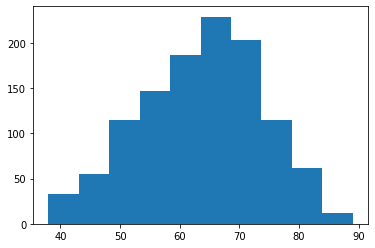

In [202]:
bob = data[data["cancer"]>0]
plt.hist(bob["age"])

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_id        54706 non-null  int64  
 1   patient_id     54706 non-null  int64  
 2   image_id       54706 non-null  int64  
 3   laterality     54706 non-null  object 
 4   view           54706 non-null  object 
 5   age            54669 non-null  float64
 6   implant        54706 non-null  int64  
 7   machine_id     54706 non-null  int64  
 8   prediction_id  54706 non-null  object 
 9   cancer         54706 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.2+ MB


In [204]:
data = data.dropna()

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54669 entries, 0 to 54705
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_id        54669 non-null  int64  
 1   patient_id     54669 non-null  int64  
 2   image_id       54669 non-null  int64  
 3   laterality     54669 non-null  object 
 4   view           54669 non-null  object 
 5   age            54669 non-null  float64
 6   implant        54669 non-null  int64  
 7   machine_id     54669 non-null  int64  
 8   prediction_id  54669 non-null  object 
 9   cancer         54669 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.6+ MB


In [206]:
X = data.drop(columns=["site_id","patient_id","image_id","machine_id","prediction_id","cancer"])
y = data["cancer"]

In [207]:
X

,laterality,view,age,implant
0,L,CC,61.0,0
1,L,MLO,61.0,0
2,R,MLO,61.0,0
3,R,CC,61.0,0
4,L,CC,55.0,0
...,...,...,...,...
54701,R,MLO,43.0,0
54702,L,MLO,60.0,0
54703,L,CC,60.0,0
54704,R,MLO,60.0,0


In [208]:
X_dummies = pd.get_dummies(X,drop_first=True)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.33, random_state=42)

In [210]:
X_train

,age,implant,laterality_R,view_CC,view_LM,view_LMO,view_ML,view_MLO
5230,52.0,0,0,0,0,0,0,1
16592,54.0,0,1,1,0,0,0,0
13666,65.0,0,0,0,0,0,0,1
30248,42.0,0,0,1,0,0,0,0
42390,71.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
44769,48.0,0,1,0,0,0,0,1
54380,57.0,0,0,1,0,0,0,0
38191,50.0,0,0,1,0,0,0,0
860,50.0,0,1,0,0,0,0,1


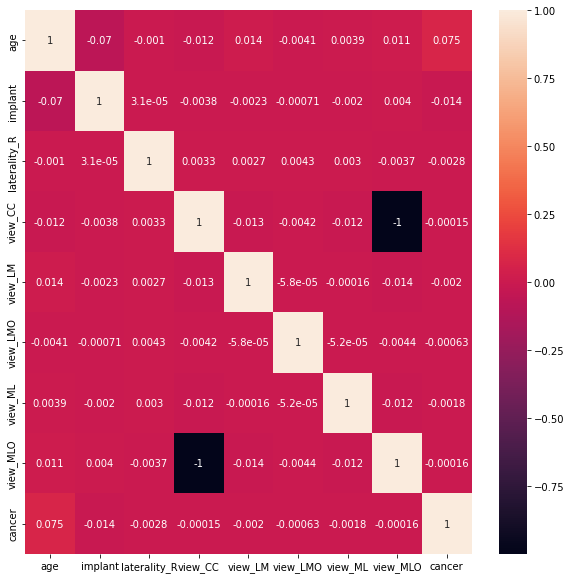

In [216]:
boy = pd.concat([X_dummies,y],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(boy.corr(),annot=True);

X_train_2 = pd.DataFrame(X_train[["view","age","implant"]])
X_test_2 = pd.DataFrame(X_test[["view","age","implant"]])

oh = OneHotEncoder()

X_train_2_oh = oh.fit_transform(X_train_2[["view","implant"]])
X_test_2_oh = oh.transform(X_test_2[["view","implant"]])

X_train_2_oh = pd.DataFrame.sparse.from_spmatrix(X_train_2_oh)
X_test_2_oh = pd.DataFrame.sparse.from_spmatrix(X_test_2_oh)

In [211]:
clf = DecisionTreeClassifier()

In [212]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [213]:
clf.score(X_test,y_test)

0.979879164126157

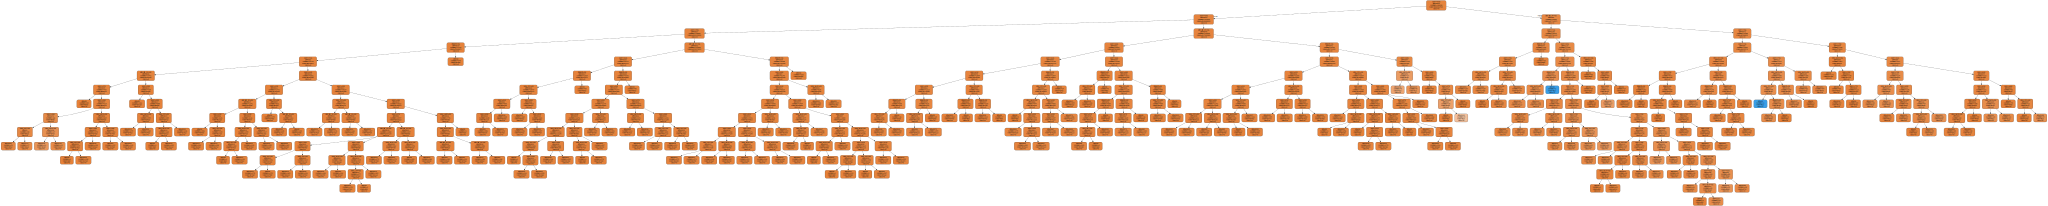

In [214]:
import graphviz

from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="cancer.dot", 
                feature_names=X_dummies.columns,
                class_names=['0','1'], 
                rounded=True, filled=True)

with open("cancer.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))